# **Experiment B1**: proof of concept local refinement
Riemannian gradient descent with local regular integration

Vary noise level and number of images

In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/MyDrive/PhD/Projects/2 - Cryo-EM/src/Cryo-EM

[Errno 2] No such file or directory: '/content/drive/MyDrive/PhD/Projects/2 - Cryo-EM/src/Cryo-EM'
/Users/wdiepeveen/Documents/PhD/Projects/2 - Cryo-EM/src/src/Cryo-EM/projects/rkhs_lifting/experiments/experimentB1


In [2]:
# install libraries in Colab env
!pip install mrcfile
!pip install aspire
!pip install quaternionic
!pip install pykeops[colab] > install.log

You should consider upgrading via the '/Users/wdiepeveen/PycharmProjects/Cryo-EM/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/Users/wdiepeveen/PycharmProjects/Cryo-EM/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/wdiepeveen/PycharmProjects/Cryo-EM/bin/python -m pip install --upgrade pip' command.
zsh:1: no matches found: pykeops[colab]


In [1]:
%cd ../../../..

/Users/wdiepeveen/Documents/PhD/Projects/2 - Cryo-EM/src/src/Cryo-EM


In [2]:
import numpy as np
import os
import logging

from projects.rkhs_lifting.experiments.experimentB1.E1_run import run_experiment
from projects.rkhs_lifting.experiments.experimentB1.E2_post_processing import post_processing

from tools.exp_tools import Exp

logger = logging.getLogger(__name__)

[pyKeOps]: Warning, no cuda detected. Switching to cpu only.


In [3]:
# Set data path
data_dir = os.path.join("results","expA2_21-10-27_10-39-37_L65_N512_r2_k90_lamV10_lamD-10")
data_filename = "solver_data_2SNR_512N"
# data_path = os.path.join(data_dir, data_filename)

# Set results folder if skip_preprocessing
# results_folder = "results/lifting_21-04-21_11-09-45"  # "results/lifting_21-04-26_12-22-06"

In [4]:
# TODO load data from experiment A: initial volume and images (gt rots)
# TODO select a subset of these images to test the algorithm over

# Experiment parameters
img_size = 65  # was 65 before and was 129 in rotation estimation paper
snr = 1 / 2  # [1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256]
num_imgs = 1  # 512 capped
k = 90
l = 3
kernel_radius = np.pi/k  # radius of kernel
sep_dist = np.pi/180
volume_reg_param = 1e10
rots_batch_size = 8192

step_size_gd = 10**-5  # TODO test in run_
stop_rots_gd = 5

# Directly start experiment
exp = Exp()

exp.begin(prefix="expB1" , postfix="L{}_N{}_l{}_k{}_lamV{}".format(img_size,num_imgs,l,k,int(np.log(volume_reg_param)/np.log(10))))
exp.dbglevel(4)

2021-10-27 19:25:55,881 INFO Results folder is results/expB1_21-10-27_19-25-55_L65_N1_l3_k90_lamV10


In [ ]:
# Experiment

logger.info("Start Experiment")
logger.info("Running Experiment for SNR = {} and {} images".format(snr, num_imgs))

run_experiment(exp=exp,
               num_imgs=num_imgs,
               snr=snr,
               img_size=img_size,
               kernel_radius=kernel_radius,
               l=l,
               sep_dist=sep_dist,
               volume_reg_param=volume_reg_param,
               data_dir=data_dir,
               data_filename=data_filename,
               )

2021-10-27 19:25:55,891 INFO Start Experiment
2021-10-27 19:25:55,893 INFO Running Experiment for SNR = 0.5 and 1 images
2021-10-27 19:25:55,894 INFO This experiment illustrates orientation refinement using a lifting approach
2021-10-27 19:25:57,610 INFO Load 3D map and downsample 3D map to desired grids of 65 x 65 x 65.
Start solver
Start Riemannian Gradient Descent Solver
2021-10-27 19:25:57,631 INFO Trying NFFT backend finufft
2021-10-27 19:25:57,647 INFO NFFT backend finufft usable.
2021-10-27 19:25:57,648 INFO Trying NFFT backend cufinufft
2021-10-27 19:25:57,651 INFO NFFT backend cufinufft not usable:
	No module named 'pycuda'
2021-10-27 19:25:57,652 INFO Trying NFFT backend pynfft
2021-10-27 19:25:57,654 INFO NFFT backend pynfft not usable:
	No module named 'pynfft'
2021-10-27 19:25:57,655 INFO Selected NFFT backend = finufft.
2021-10-27 19:25:57,754 INFO 0 | k = 0 | cost = 0.7045881748199463
2021-10-27 19:25:57,756 INFO Computing qs
2021-10-27 19:25:58,934 INFO 0 | k = 1 | cost

2021-10-10 14:17:00,140 INFO Start Postprocessing
2021-10-10 14:17:00,150 INFO Postprocessing started
2021-10-10 14:17:00,994 INFO Applying forward transformations in pipeline
2021-10-10 14:17:00,998 INFO All forward transformations applied
2021-10-10 14:17:01,002 INFO Loaded 1 images
2021-10-10 14:17:01,426 INFO Applying forward transformations in pipeline
2021-10-10 14:17:01,433 INFO All forward transformations applied
2021-10-10 14:17:01,435 INFO Loaded 1 images
integrated (averaged) density = 19.78565742339277


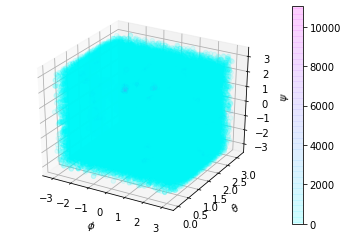

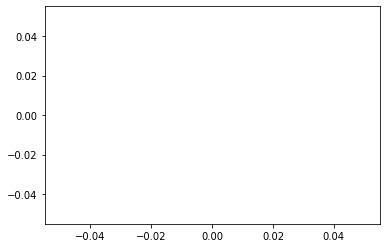

In [8]:
logger.info("Start Postprocessing")
# Postprocessing
post_processing(exp=exp,
               num_imgs=num_imgs,
               snr=snr,
              #  results_folder=results_folder #?
               )
